<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/unidade4_cn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Unidade 4 - Aproximação de funções




Nesta unidade, vamos estudar métodos para aproximar funções e dados tabelados. Veremos duas maneiras de aproximar funções: a **Interpolação** e o **Método dos Mínimos Quadrados**. A seguir, apresentamos alguns exemplos de resolução em *Python*. Vamos utilizar as bibliotecas [numpy](https://numpy.org/) e [scipy](https://scipy.github.io/devdocs/index.html).

# Método dos Mínimos Quadrados


**Problema Discreto:**

Objetivo: Minimizar resíduo (erro).

Para obter a melhor aproximação vamos minimizar a função:

$$  r({\bf a}) = \sum_{i=1}^m r_i({\bf a})^2,$$

sendo o resíduo $r_i({\bf a}) = f(x_i,{\bf a}) - y_i$, com $(x_i,y_i)$ dados e $m$ tamanho dos vetores $x$ e $y$.

Para ajustar os parâmetros da função $r({\bf a})$ vamos utilizar as bibliotecas *numpy* e *scipy*.

 *Assunto descrito em aula, para mais detalhes, veja material disponível no moodle.*

**Exemplo (1)**

Ajustar os dados abaixo usando uma reta (Regressão linear):

$$\begin{array}{c|ccccc}
x_i & 0 & 0.25 & 0.5 & 0.75 & 1\\
\hline
y_i & 1 & 1.2840 & 1.6487 & 2.1170 & 2.7183 \\
\end{array}$$

*Solução:*

A função aproximadora é dada por $g(x)=a_0 + a_1x$. A tabela possui $5$ pontos portanto $m=5$.

[[67.5         1.94856894]
 [ 1.94856894  2.95145074]]
[69.705       4.94584248]
[1.0034159  1.01327032]
residuo =  0.0003196239999689366


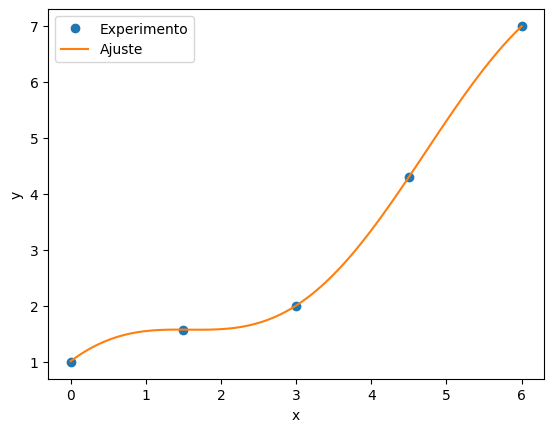

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

def flinear(x, a):
    #y = a[0] + a[1]*x
    y = a[0]*x + a[1]*np.cos(x)
    return y

def rlinear(a, x, y):
    return flinear(x, a) - y

#xi = np.array([0, 0.25, 0.5, 0.75 , 1])
#yi = np.array([1, 1.2840, 1.6487, 2.117, 2.7183])

#Exemplo 1 (aula)
#xi = np.array([0, 1, 2, 3, 4])
#yi = np.array([0, 1, 1, 4, 4])

#Exemplo 2 (aula)
xi = np.array([0, 1.5, 3, 4.5, 6])
yi = np.array([1, 1.57, 2, 4.3, 7])
m = len(xi)
v_1 = np.ones(m)

#Sistema para o ajuste por reta
A = np.zeros((2,2))
b = np.zeros(2)

# Sistema do exemplo 1
#A[0,0] = np.vdot(v_1,v_1)
#A[1,0] = np.vdot(v_1,xi)
#A[0,1] = A[1,0]
#A[1,1] = np.vdot(xi, xi)
#b[0] = np.vdot(v_1, yi)
#b[1] = np.vdot(xi, yi)

#Sistema do ajuste g(x) = a0x + a1cos(x), exemplo 2
A[0,0] = np.vdot(xi, xi)
A[1,0] = np.vdot(xi, np.cos(xi))
A[0,1] = A[1,0]
A[1,1] = np.vdot(np.cos(xi), np.cos(xi))
b[0] = np.vdot(xi, yi)
b[1] = np.vdot(np.cos(xi), yi)
print(A)
print(b)
a = np.linalg.solve(A, b)
print(a)
res = 0
for i in range(m):
   res += (rlinear(a, xi[i], yi[i])**2)
print("residuo = ", res)

x_test = np.linspace(xi[0], xi[m-1], 100)

y_lin = flinear(x_test, a)

plt.figure(1)
plt.plot(xi, yi, 'o', label='Experimento')
plt.plot(x_test, y_lin, label='Ajuste')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Problema Contínuo**

No caso contínuo, o problema de ajuste de curvas consiste em: dada uma função $f(x)$ contínua em um intervalo $[a,b]$ e escolhidas as funções $g_0(x), g_1(x),\ldots, g_n(x)$ todas contínuas em $[a,b]$, queremos determinar $a_0,a_1,\ldots,a_n$ tais que a função $\displaystyle{g(x) = \sum_{k=0}^na_kg_k(x)}$ seja a melhor aproximação de $f(x)$ no intervalo $[a,b]$.

Determinar a *melhor aproximação*, como no caso discreto, significa minimizar a função resíduo dada por,

$$r({\bf a}) = \int_a^b[f(x) - \sum_{k=0}^na_kg_k(x)]^2dx.$$

No caso discreto, o resíduo era definido com uma soma finita, já o caso contínuo a definição do resíduo é feita por meio de uma integral em $[a,b]$. Para facilitar a notação, é comum utilizar a notação de produto escalar de duas funções.

1. Caso discreto $\displaystyle{<f,g> = \sum_{i=0}^m f(x_i)g(x_i)}$.
2. Caso contínuo $\displaystyle{<f,g> = \int_a^bf(x)g(x)dx}.$

Importante, lembrar que o produto escalar entre funções satisfaz as propriedades:
1. Linearidade: $\displaystyle{<ag_1+a_2g_2, f> = a_1<g_1,f>+a_2<g_2,f>}.$
2. Comutatividade: $\displaystyle{<f,g> = <g,f>}.$
3. Não negatividade: $\displaystyle{<g,g> \ge 0}$ e $\displaystyle{<g,g> = 0 \Leftrightarrow g \equiv 0}$.

**1. Exercício:** Verifique estas propriedades para os produtos escalares definidos para o caso discreto e para o caso contínuo.

Como fizemos para o caso discreto, queremos determinar os parâmetros $a_0,a_1,\ldots,a_n$ que minimizam o resíduo, ou seja, $\displaystyle{\dfrac{\partial r}{\partial a_j} = 0,}$ com $j=0,1,\ldots,n$. Assim, para cada $j$ temos uma equação da forma,
$$\int_a^b2[f(x) - \sum_{k=0}^na_kg_k(x)]g_j(x)dx = 0, \mbox{com } j = 0,\ldots, n.$$
Pelas propriedades de produto escalar, temos
$$\int_a^bf(x)g_j(x)dx -\sum_{k=0}^na_k\int_a^bg_k(x)g_j(x)dx = 0,$$
que implica em,
$$a_0\int_a^bg_0(x)g_j(x)dx + a_1\int_a^bg_1(x)g_j(x)dx + \ldots + a_n\int_a^bg_n(x)g_j(x)dx = \int_a^bf(x)g_j(x)dx.$$
Dessa forma obtemos o sistema normal,
$$\left(\begin{array}{cccc}
<g_0,g_0> & <g_1,g_0> & \ldots & <g_n,g_0> \\
<g_0,g_1> & <g_1,g_1> & \ldots & <g_n,g_1> \\
\vdots & & \ddots & \vdots \\
<g_0,g_n> & <g_1,g_n> & \ldots & <g_n,g_n>
\end{array}\right)\left(\begin{array}{c}
a_0\\
a_1\\
\vdots\\
a_n
\end{array}\right) = \left(\begin{array}{c}
<f,g_0>\\
<f,g_1>\\
\vdots\\
<f,g_n>
\end{array}\right),$$
sendo $\displaystyle{<g,f> = \int_a^bg(x)f(x)dx}$.








**Exemplo 1:**

Queremos subsituir a função $\displaystyle{f(x) = \sin\left(\frac{\pi}{4}x\right)}$ por um polinômio de grau 3, no intervalo $[0,1]$. Como a função $\displaystyle{\sin\left(\frac{\pi}{4}x\right)}$ é uma função ímpar, ou seja, $f(-x) = -f(x)$, vamos escolher um polinômio ímpar para o ajuste, $g(x) = a_0x+a_1x^3$. Isso significa, que $g_0(x) = x$ e $g_1(x) = x^3$. Assim, precisamos minimizar a função
$$r(a_0,a_1) = \int_0^1(\sin\frac{\pi}{4}x - a_0x - a_1x^3)^2dx.$$
Assim, o sistema normal é dado por,
$$\left(\begin{array}{cc}
\int_0^1x^2dx & \int_0^1x^4dx\\
\int_0^1x^4dx & \int_0^1x^6dx
\end{array}\right)
\left(\begin{array}{c}
a_0\\
\\
a_1\\
\end{array}\right) = \left(\begin{array}{c}
\int_0^1x\sin(\frac{\pi}{4}x) dx\\
\int_0^1x^3\sin(\frac{\pi}{4}x) dx
\end{array}\right),$$

Calculando as integrais (algumas por partes: $\int udv = uv -\int v du$) obtemos:

$$\begin{align}
\int_0^1x\sin(\frac{\pi}{4})dx & = -x\frac{4}{\pi}\cos(\frac{\pi}{4}x)|_0^1 + \frac{4}{\pi}\int_0^1\cos(\frac{\pi}{4}x)dx \\
& = -\frac{4}{\pi}\cos(\frac{\pi}{4})+\frac{16}{\pi^2}\sin(\frac{\pi}{4})\\
& \approx 0.2460020203444062
\end{align}$$

$$\begin{align}
\int_0^1x^3\sin(\frac{\pi}{4})dx & = -x^3\frac{4}{\pi}\cos(\frac{\pi}{4}x)|_0^1 + \frac{12}{\pi}\int_0^1 x^2\cos(\frac{\pi}{4}x)dx \\
& = -\frac{4}{\pi}\cos(\frac{\pi}{4})+\frac{12}{\pi}[\dfrac{4}{\pi}x^2\sin(\frac{\pi}{4}x)|_0^1 - \frac{8}{\pi}\int_0^1x\sin(\frac{\pi}{4}x)dx] \\
& \approx 0.14581796889606857
\end{align}$$

$$\int_0^1 x^2dx = \frac{x^3}{3}|_0^1 = \frac{1}{3}$$

$$\int_0^1 x^4dx = \frac{x^5}{5}|_0^1 = \frac{1}{5}$$

$$\int_0^1 x^6dx = \frac{x^7}{7}|_0^1 = \frac{1}{7}$$



In [ ]:
import numpy as np
print(-(4/np.pi)*np.cos(np.pi/4)+(16/np.pi**2)*np.sin(np.pi/4))
print(-(4/np.pi)*np.cos(np.pi/4)+(12/np.pi)*((4/np.pi)*np.sin(np.pi/4) - (8/np.pi)*0.2460020203444062))

Assim,

$$\left(\begin{array}{cc}
\dfrac{1}{3} & \dfrac{1}{5}\\
\dfrac{1}{5} & \dfrac{1}{7}
\end{array}\right) \left(\begin{array}{c}
a_0\\ \\
a_1
\end{array}\right) = \left(\begin{array}{c}
0.2460020203444062\\ \\
0.14581796889606857
\end{array}\right)$$

cuja solução é $a_0 = 0.7848162$ e $a_1 = -0.07801689$.
Portanto, a função aproximadora é $g(x) = 0.7848162x -0.07801689x^3.$




[ 0.7848162  -0.07801689]


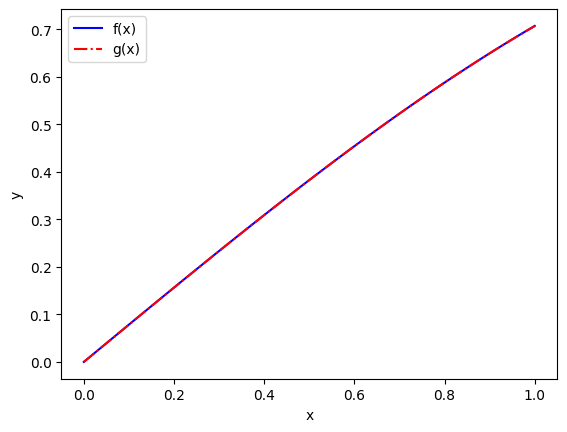

In [2]:
import numpy as np

def f(x):
  return np.sin((np.pi/4)*x)

def g(x, a):
  return a[0]*x + a[1]*x**3

A = np.array([[1/3, 1/5], [1/5, 1/7]])
b = np.array([0.2460020203444062, 0.14581796889606857])
a = np.linalg.solve(A, b)
print(a)

x = np.linspace(0,1,100)
y = f(x)
ya = g(x, a)

plt.figure(1)
plt.plot(x, y, 'b-', label='f(x)')
plt.plot(x, ya, 'r-.', label='g(x)')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Mínimos quadrados com peso**

A formulação do Método dos Mínimos Quadrados (MMQ) usando a definição de produto escalar de funções nos permite:

1. Atribuir diferentes  graus de importância no intervalo de aproximação. Isso é feito quando incluímos uma função peso, $w(x)$ no produto escalar,



*   Discreto: $\displaystyle{<f,g> = \sum_{i=1}^mw(x_i)f(x_i)g(x_i),} $
*   Contínuo: $\displaystyle{<f,g> = \int_a^b w(x)f(x)g(x)dx,}$

sendo $w(x)$ uma função contínua e $w(x)>0$ em $[a,b]$.

**Funções Ortogonais**

O conceito de ortogonalidade em um conjunto de funções, se origina do conceito de ortogonalidade entre vetores, caracterizado pelo produto escalar nulo.

Uma família de funções, $g_i(x)$, com $i=0,1,\ldots$ é ortogonal em relação ao produto escalar associado ao peso $w(x)$ se $<g_i,g_j>=0$ para todo $i\neq j$.

Se as funções $g_i(x)$ que compõem a função aproximadora $\displaystyle{g(x) = \sum_{k=0}^ng_k(x)}$ são ortogonais, o sistema normal se torna diagonal. Ou seja, apenas a diagonal da matriz é não nula. Portanto, a solução do sistema resulta em

$$a_j = \dfrac{<f,g_i>}{<g_i,g_i>}, j = 0,1,\ldots,n.$$

Exemplos de famílias de funções ortogonais:



*   As funções trigonométricas, que dão origem à série de Fourier.
*   Os polinômios ortogonais: polinômios de Legendre, Laguerre, Chebyshev, entre outros, que cada vez mais aparecem em problemas que envolvem aproximações.







**Exemplo 2:**

Vamos construir os três primeiros polinômios ortogonais em relação ao produto escalar

$$<f,g> = \int_0^1f(x)g(x)dx,$$

 e aproximar $f(x)=e^x$ no intervalo $[0,1]$ por um polinômio de grau 2, ou seja, $g(x) = a_0p_0(x) + a_1p_1(x)+a_2p_2(x)$.

Vamos assumir que os polinômios são mônicos (coeficiente de maior grau igual a 1). Assim, $p_0(x)=1$, $p_1(x)=\alpha_0+x$ e $p_2(x)=\beta_0+\beta_1 x+ x^2$. Vamos determinar, $\alpha_0,\beta_0$ e $\beta_1$ de forma que $p_0(x),p_1(x)$ e $p_2(x)$
sejam ortogonais. Como $<p_0,p_1> = 0$, temos,

$$ \int_0^1 1(\alpha_0 + x)dx =\alpha_0 x|_0^1 + \dfrac{x^2}{2}|_0^1 =\alpha_0 +\dfrac{1}{2} = 0 \Longrightarrow \alpha_0 = -\dfrac{1}{2}.$$

Porttanto, $\displaystyle{p_1(x) = x - \dfrac{1}{2}}$. Como $<p_0,p_2> = 0$ e $<p_1,p_2>=0$, obtemos,

$$\int_0^1 1(\beta_0+\beta_1 x+ x^2)dx = \beta_0 x|_0^1 + \beta_1\dfrac{x^2}{2}|_0^1 + \dfrac{x^3}{3}|_0^1 = \beta_0 + \dfrac{\beta_1}{2} + \dfrac{1}{3} = 0,$$

$$\int_0^1 (x-\dfrac{1}{2})(\beta_0+\beta_1 x+ x^2)dx = \beta_0(\dfrac{x^2}{2}|_0^1 - \dfrac{x}{2}|_0^1) + \beta_1(\dfrac{x^3}{3}|_0^1  - \dfrac{x^2}{4}|_0^1) + \dfrac{x^4}{4}|_0^1 - \dfrac{x^3}{6}|_0^1 = \dfrac{\beta_1}{12} + \dfrac{1}{12} = 0.$$

Dessa forma, $\beta_1 = -1$ e $\beta_0 = 1/6$ e os polinômios $p_0(x)=1$, $p_1(x)=x-1/2$ e $p_2(x) = x^2-x+1/6$ são ortogonais.
Portanto, ao usarmos esta família de polinômios para aproximar $f(x)$, vamos obter um sistema diagonal,

$$\left(
  \begin{array}{ccc}
<p_0,p_0> & 0  &  0 \\
 0 & <p_1,p_1> &  0 \\
0 & 0 & <p_2,p_2>
\end{array}\right)\left(\begin{array}{c}
a_0\\
a_1\\
a_2
\end{array}\right) = \left(\begin{array}{c}
<f,p_0>\\
<f,p_1> \\
<f,p_2>
\end{array}\right)$$

e a solução do sistema será:

$$a_0=\dfrac{\int_0^1e^xdx}{\int_0^1 dx} = e - 1,$$

$$a_1 = \dfrac{\int_0^1e^x(x-1/2)dx}{\int_0^1(x-1/2)^2 dx} = 6(3-e),$$

$$a_2=\dfrac{\int_0^1e^x(x^2-1+1/6)dx}{\int_0^1 (x^2-1+1/6)^2dx} = 30(7e-19).$$

Assim, $g(x) = (e-1) + 6(3-e)(x-1/2) + 30(7e-19)(x^2-1+1/6).$

Exercícios:

1. Aproxime a tabela de dados usando MMQ:

$$\begin{array}{c|ccccc}
x_i & -2 & -1 & 1 & 2\\
\hline
y_i & 1 & -3 & 1 & 9 \\
\end{array}$$

com as funções aproximadoras $g(x) = a_0 x + a_1x^2$ e $h(x)=a_0 + a_1x^2$. Qual função oferece a melhor aproximação?

2. Aproxime a função $f(x)=3-x$ por $g(x)=a_1+a_2\dfrac{1}{x}$, usando MMQ, no intervalo $[1,2]$.